Text(0.5, 0, '')

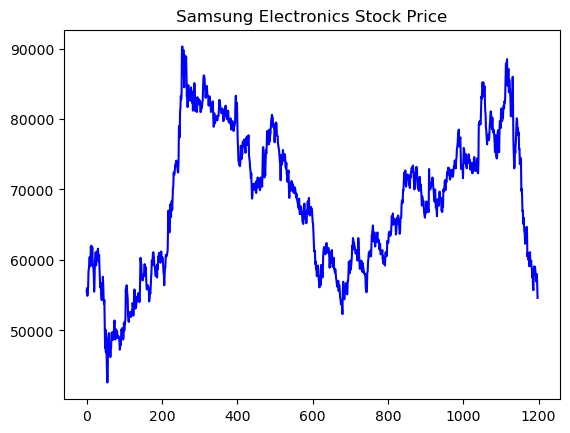

In [6]:
#!pip install finance-datareader
#!pip install -U finance-datareader
#!pip install plotly
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

samsung = fdr.DataReader('005930', '2020')

seq_data = (samsung[['Open']]).to_numpy()

plt.plot(seq_data, color='blue')
plt.title("Samsung Electronics Stock Price")
plt.xlabel("Date")
plt.xlabel("")


In [7]:
seq_data = (samsung[['Open']]).to_numpy()

def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X, y = make_sample(seq_data, 7)
print(X.shape, y.shape)
print(X[0], y[0])

(1191, 7, 1) (1191, 1)
[[55500]
 [56000]
 [54900]
 [55700]
 [56200]
 [58400]
 [58800]] [59600]


In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

seq_data = []
for i in np.arange(0, 1000):
    seq_data += ([np.sin(np.pi * i * 0.01)])

X, y = make_sample(seq_data, 10)

Epoch 1/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0366
Epoch 2/100
31/31 [==============================] - 0s 942us/step - loss: 0.0208
Epoch 3/100
31/31 [==============================] - 0s 901us/step - loss: 0.0136
Epoch 4/100
31/31 [==============================] - 0s 837us/step - loss: 0.0095
Epoch 5/100
31/31 [==============================] - 0s 835us/step - loss: 0.0077
Epoch 6/100
31/31 [==============================] - 0s 863us/step - loss: 0.0068
Epoch 7/100
31/31 [==============================] - 0s 825us/step - loss: 0.0064
Epoch 8/100
31/31 [==============================] - 0s 823us/step - loss: 0.0059
Epoch 9/100
31/31 [==============================] - 0s 797us/step - loss: 0.0055
Epoch 10/100
31/31 [==============================] - 0s 791us/step - loss: 0.0051
Epoch 11/100
31/31 [==============================] - 0s 751us/step - loss: 0.0047
Epoch 12/100
31/31 [==============================] - 0s 747us/step - loss: 0.0043
Epoch 13/100
31

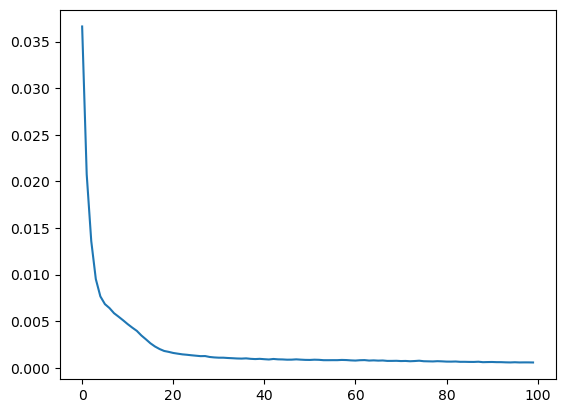

In [15]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=100,verbose=1)
plt.plot(history.history['loss'], label='loss')
plt.show()


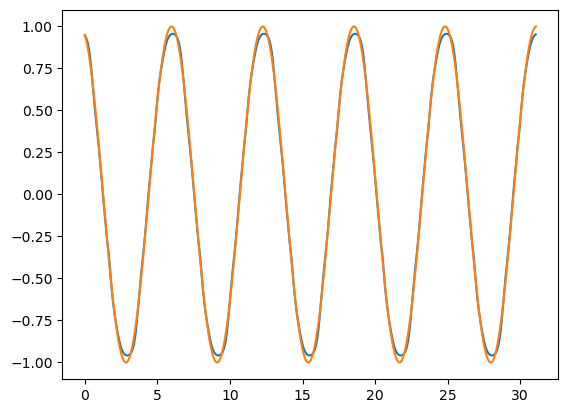

In [17]:
seq_data = []

for i in np.arange(0, 1000):
    seq_data += ([np.cos(np.pi * i * 0.01)])

X, y = make_sample(seq_data, 10)

y_pred = model.predict(X, verbose=0)

plt.plot(np.pi * np.arange(0, 990)*0.01, y_pred)
plt.plot(np.pi * np.arange(0, 990)*0.01, y)

plt.show()

In [18]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samsung = fdr.DataReader('005930', '2016')
print(samsung)

openValues = samsung[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(openValues)

TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2024-11-06  57600  58000  56300  57300  22092218 -0.005208
2024-11-07  56900  58100  56800  57500  17043102  0.003490
2024-11-08  58000  58300  57000  57000  13877396 -0.008696
2024-11-11  56700  56800  55000  55000  29811326 -0.035088
2024-11-12  54600  54600  53200  53300  27351897 -0.030909

[2177 rows x 6 columns]


In [21]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 100)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
                activation='tanh',
                return_sequences=False))
model.add(Dense(1,))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
118/118 [==============================] - 2s 9ms/step - loss: 0.0216
Epoch 2/100
118/118 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 3/100
118/118 [==============================] - 1s 9ms/step - loss: 8.6836e-04
Epoch 4/100
118/118 [==============================] - 1s 9ms/step - loss: 8.5883e-04
Epoch 5/100
118/118 [==============================] - 1s 9ms/step - loss: 8.4674e-04
Epoch 6/100
118/118 [==============================] - 1s 9ms/step - loss: 8.3521e-04
Epoch 7/100
118/118 [==============================] - 1s 10ms/step - loss: 8.3151e-04
Epoch 8/100
118/118 [==============================] - 1s 10ms/step - loss: 8.1123e-04
Epoch 9/100
118/118 [==============================] - 1s 10ms/step - loss: 8.5321e-04
Epoch 10/100
118/118 [==============================] - 1s 9ms/step - loss: 8.0687e-04
Epoch 11/100
118/118 [==============================] - 1s 9ms/step - loss: 8.0233e-04
Epoch 12/100
118/118 [==============================] - 1

4/4 [==============================] - 0s 2ms/step


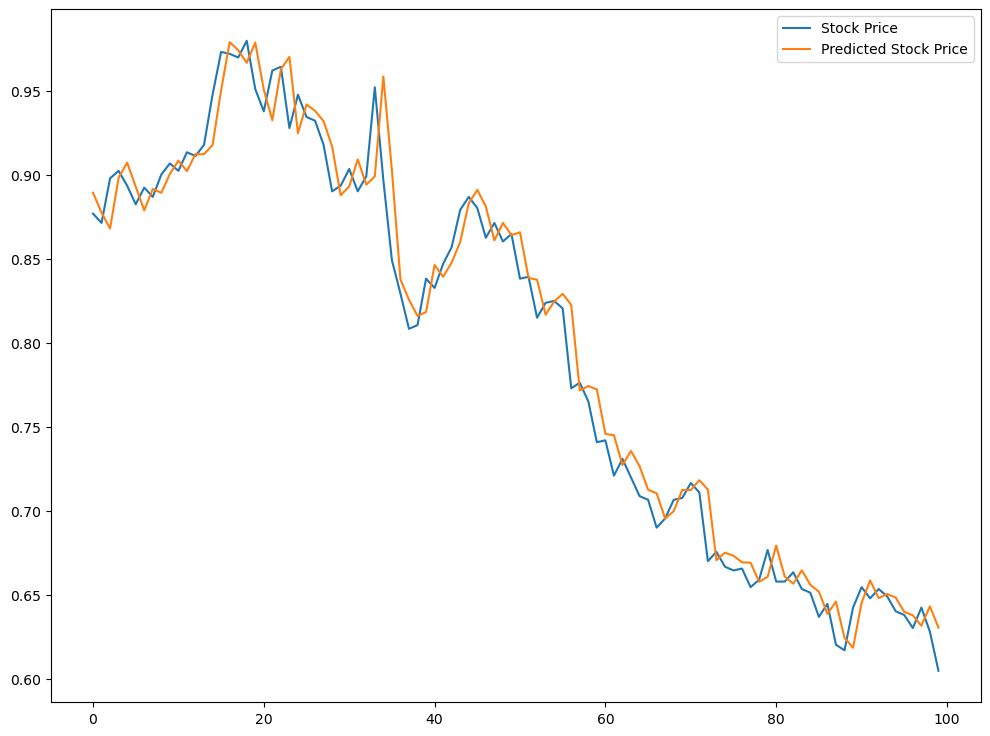

In [23]:
X_test, y_test = make_sample(test_data, 100)
pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(y_test, label='Stock Price')
plt.plot(pred, label='Predicted Stock Price')
plt.legend()
plt.show()